In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df_path = r'../../DATA/WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [40]:
df = pd.read_csv(df_path)

In [41]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [42]:
# Binary: Attrition, Gender, Over18, OverTime

In [43]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [44]:
# One-hot: BusinessTravel, Department, EducationField, JobRole, MaritalStatus

In [45]:
df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix='Department')).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix='Education')).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix='JobRole')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix='Marital')).drop('MaritalStatus', axis=1)

In [46]:
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)

In [47]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Marital_Divorced,Marital_Married,Marital_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,...,0,0,0,0,0,1,0,0,1,0


In [48]:
df = df.drop('EmployeeNumber', axis=1)

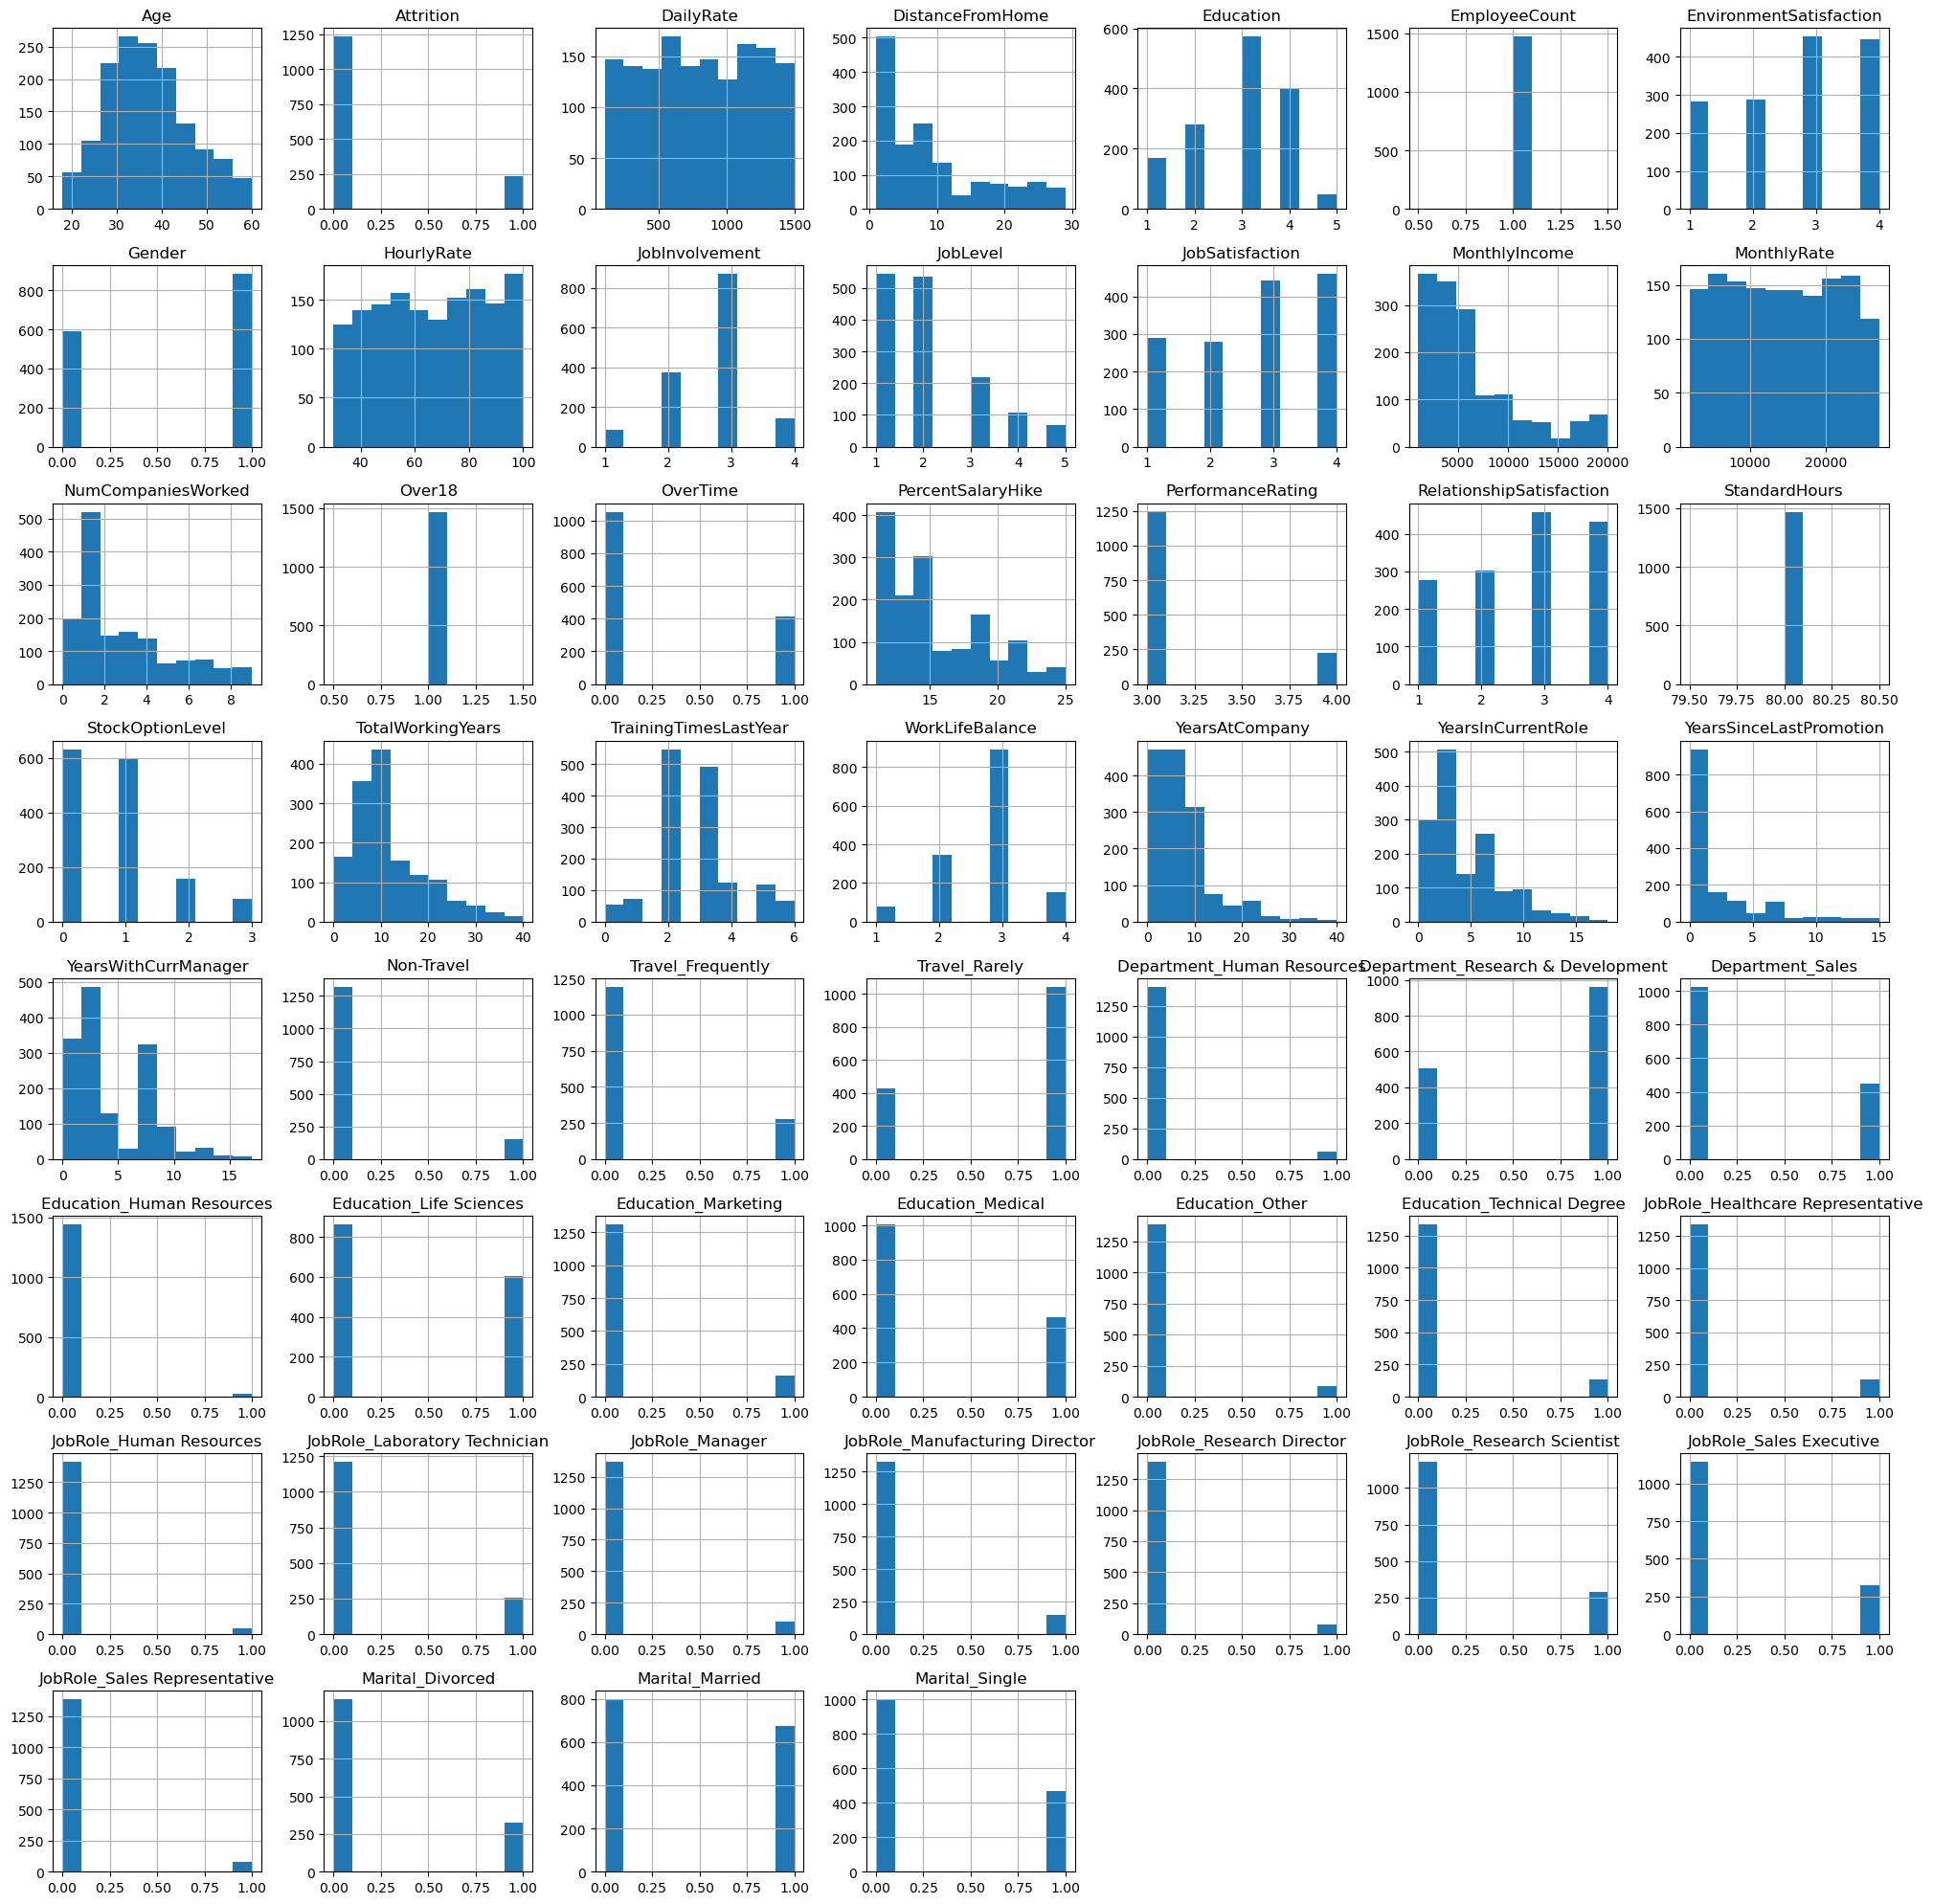

In [49]:
df.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

In [50]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [51]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Marital_Divorced,Marital_Married,Marital_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,...,0,0,0,0,0,1,0,0,1,0


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [53]:
X, y = df.drop('Attrition', axis=1), df['Attrition']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
model = RandomForestClassifier(n_jobs=-1)

In [56]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [59]:
model.score(X_test, y_test)

0.8401360544217688

In [66]:
sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], 
                             reverse=True))

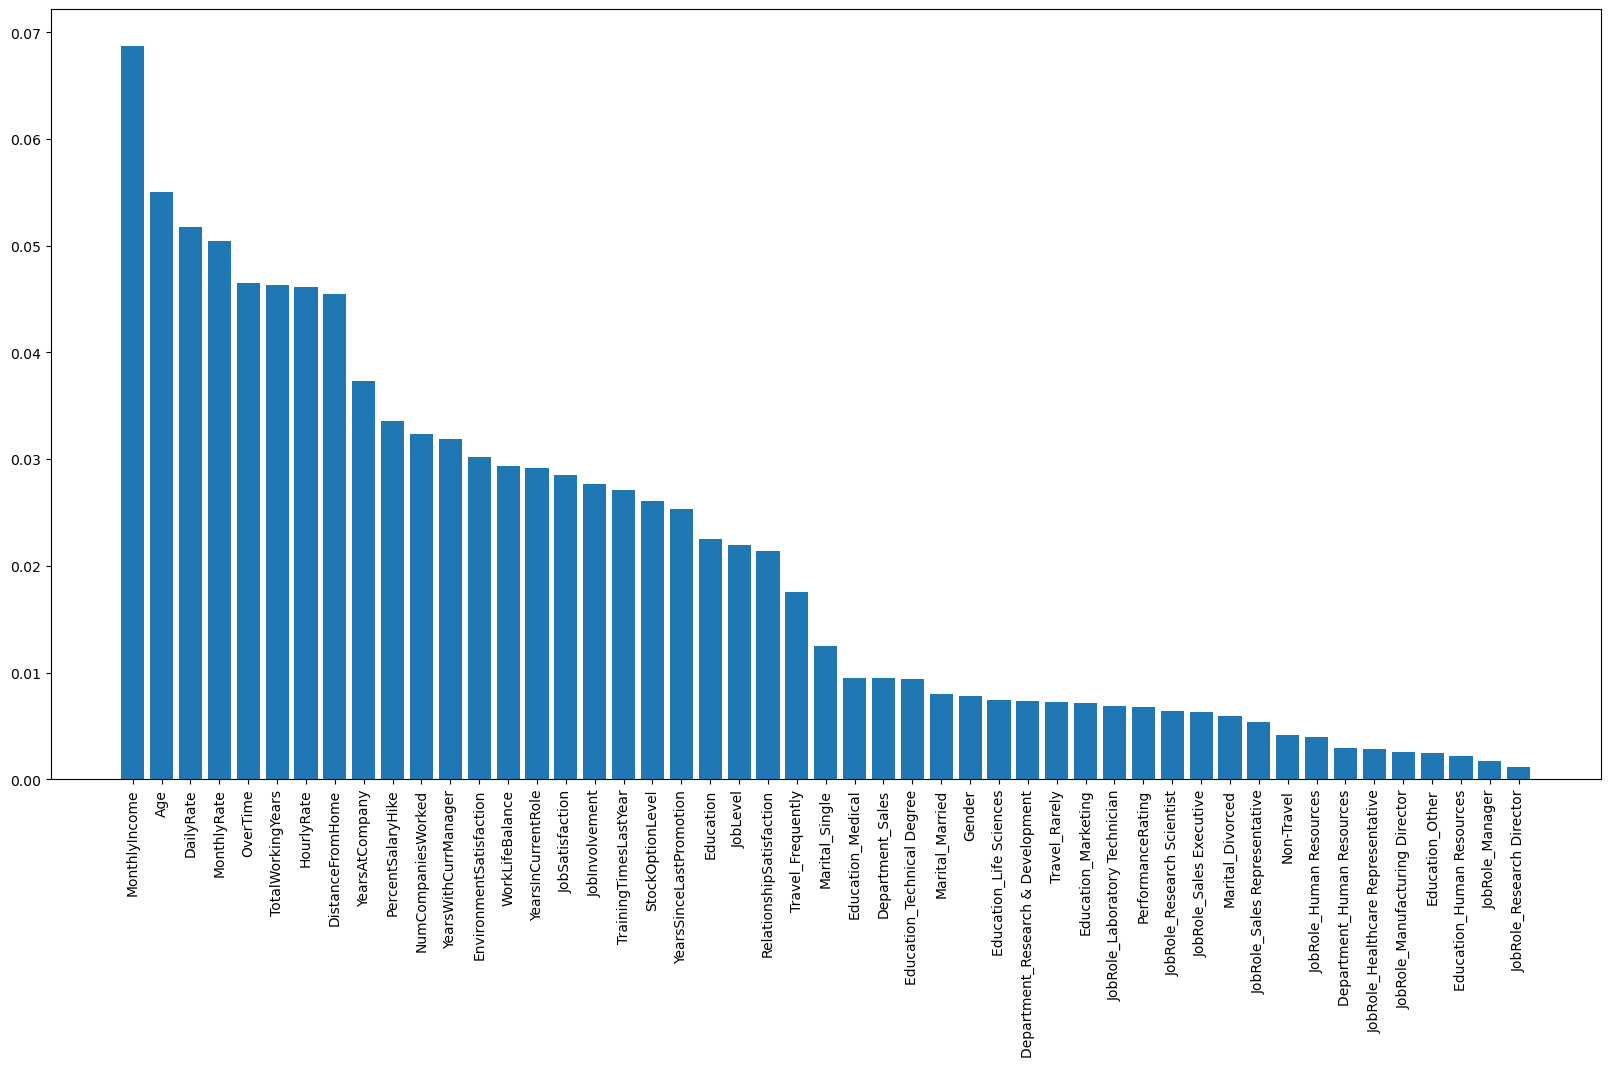

In [73]:
plt.figure(figsize=(20, 10))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation=90)

plt.show()